# Preparación de los datos

In [2]:
''''
FUENTE DE DATOS
'''
import pandas as pd
import numpy as np
from statistics import mode
from pandas.api.types import CategoricalDtype
df = pd.read_csv("housing_train.csv", low_memory=False)

In [3]:
'''
ANALISIS EXPLOATORIO Y PREPROCESAMIENTO
'''
df.info()
df.describe() # describe la data
df.isnull() # si hay nulos
dataNull=df.isnull().sum() # conteo de nulos para cada columna
print([dataNull[dataNull > 0]])
print([dataNull[dataNull > 0]/df.shape[0]])
df['Alley'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [4]:
dfTrain=pd.read_csv("housing_train.csv")
dfTest=pd.read_csv("housing_test.csv")

In [5]:
dfTrain.shape
dfTrain["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
dfTest.shape

(1459, 80)

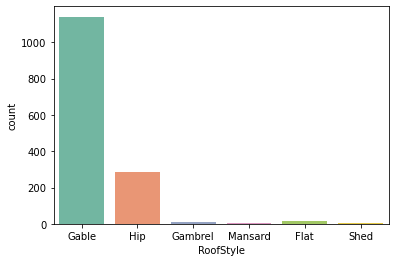

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

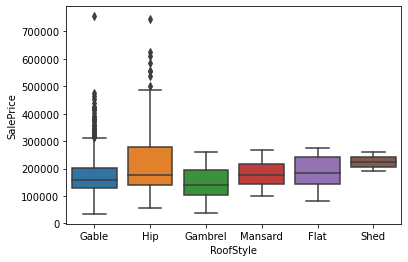

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="RoofStyle", data=df, palette="Set2")
plt.show()
sns.boxplot(x=df["RoofStyle"], y=df["SalePrice"])

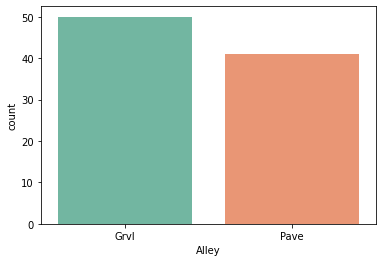

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

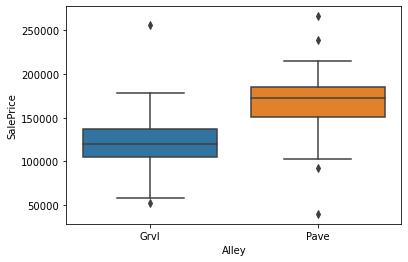

In [8]:
sns.countplot(x="Alley", data=df, palette="Set2")
plt.show()
sns.boxplot(x=df["Alley"], y=df["SalePrice"])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

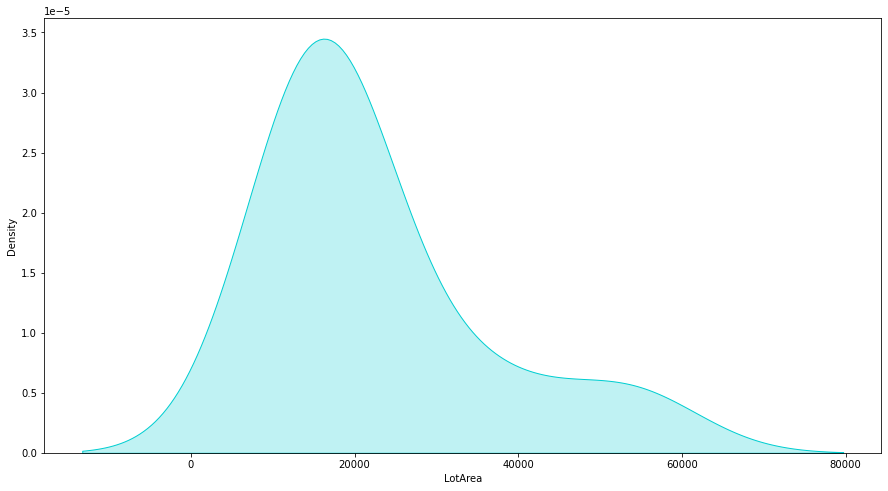

In [9]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df["LotArea"][df.SalePrice>500000], color="darkturquoise", shade=True)

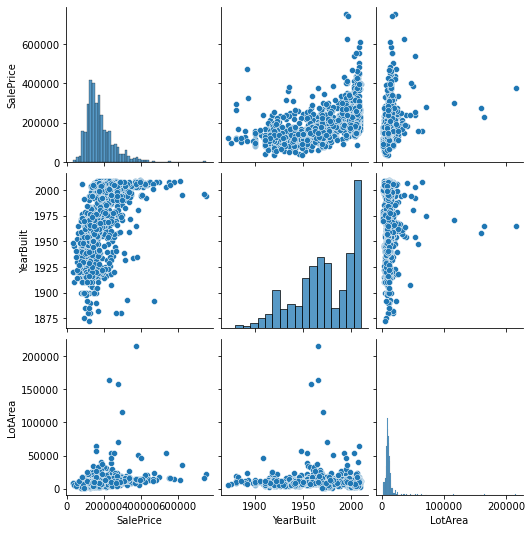

In [10]:
cols=["SalePrice", "YearBuilt", "LotArea"]
sns.pairplot(df[cols])

In [11]:
# Identificando las variables que tienen una mayor correlacion con el precio
corrTrain=df.corr()
print(corrTrain['SalePrice'].sort_values(ascending=False)[:10], '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



# Selección y tratamiento de datos numéricos (int, float)

## Lista de columnas

In [12]:
columnas = df.columns.tolist()
print(columnas)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

## Selección y tratamiento de datos numéricos (int, float)

In [13]:
print("\n Numerical column:")
i=0
dfnum = df.select_dtypes(exclude=['object']) # excluir valores no numericos
for col in dfnum.columns:
    i = i + 1
    print(i, " ", col)


 Numerical column:
1   Id
2   MSSubClass
3   LotFrontage
4   LotArea
5   OverallQual
6   OverallCond
7   YearBuilt
8   YearRemodAdd
9   MasVnrArea
10   BsmtFinSF1
11   BsmtFinSF2
12   BsmtUnfSF
13   TotalBsmtSF
14   1stFlrSF
15   2ndFlrSF
16   LowQualFinSF
17   GrLivArea
18   BsmtFullBath
19   BsmtHalfBath
20   FullBath
21   HalfBath
22   BedroomAbvGr
23   KitchenAbvGr
24   TotRmsAbvGrd
25   Fireplaces
26   GarageYrBlt
27   GarageCars
28   GarageArea
29   WoodDeckSF
30   OpenPorchSF
31   EnclosedPorch
32   3SsnPorch
33   ScreenPorch
34   PoolArea
35   MiscVal
36   MoSold
37   YrSold
38   SalePrice


### Opción para tratar datos faltantes, eliminar las variables:

In [14]:
# ELIMINACION DE ALGUNAS VARIABLES
#df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df.shape

(1460, 81)

In [15]:
'''
# Dropna elimina cualquier fila cuyos valores en cualquier columna sean nulos
dfTest.shape
dfTemp=dfTest.dropna()
dfTemp.shape
'''

'\n# Dropna elimina cualquier fila cuyos valores en cualquier columna sean nulos\ndfTest.shape\ndfTemp=dfTest.dropna()\ndfTemp.shape\n'

In [16]:
# Eliminar la variable FireplaceQu
#dfTrain.drop(['FireplaceQu'], axis=1, inplace=True)  
dfTrain.shape

# LLenar con la mediana o mean
dfTrain.fillna(dfTrain.median())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Completando datos faltantes con la media de cada columna

In [17]:
dfnum = dfnum.fillna(dfnum.mean())
dfnum.head()
dfnum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [18]:
print("\n Numerical column:")
i=0
dfnum = df.select_dtypes(exclude=['object']) # excluir valores no numericos
for col in dfnum.columns:
    i = i + 1
    print(i, " ", col)

x = dfnum.fillna(dfnum.mean())
x.head()
dfnum = x


 Numerical column:
1   Id
2   MSSubClass
3   LotFrontage
4   LotArea
5   OverallQual
6   OverallCond
7   YearBuilt
8   YearRemodAdd
9   MasVnrArea
10   BsmtFinSF1
11   BsmtFinSF2
12   BsmtUnfSF
13   TotalBsmtSF
14   1stFlrSF
15   2ndFlrSF
16   LowQualFinSF
17   GrLivArea
18   BsmtFullBath
19   BsmtHalfBath
20   FullBath
21   HalfBath
22   BedroomAbvGr
23   KitchenAbvGr
24   TotRmsAbvGrd
25   Fireplaces
26   GarageYrBlt
27   GarageCars
28   GarageArea
29   WoodDeckSF
30   OpenPorchSF
31   EnclosedPorch
32   3SsnPorch
33   ScreenPorch
34   PoolArea
35   MiscVal
36   MoSold
37   YrSold
38   SalePrice


## Datos Categóricos: Conteo

In [19]:
dfcat = df.select_dtypes(exclude=['int64', 'float64']) ## Excluye todos los valoes numericos
for col in dfcat.columns:
    print(dfcat[col].unique()) # para pintar solo los nombres de categorias
    print(dfcat[col].value_counts()) # para pintar el nombre de los elementos unicos de cada categoria
    print(dfcat[col].value_counts().reset_index(name='freq')) # lo mismo que el anterior pero le pone index en lugar de nombre


['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
     index  freq
0       RL  1151
1       RM   218
2       FV    65
3       RH    16
4  C (all)    10
['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64
  index  freq
0  Pave  1454
1  Grvl     6
[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
  index  freq
0  Grvl    50
1  Pave    41
['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
  index  freq
0   Reg   925
1   IR1   484
2   IR2    41
3   IR3    10
['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
  index  freq
0   Lvl  1311
1   Bnk    63
2   HLS    50
3   Low    36
['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
    index  freq
0  AllPub  1459
1  NoSeWa     1
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corne

## Completando datos categóricos: fillna -> moda

In [20]:
for col in dfcat.columns:
    dfcat[col].fillna(dfcat[col].mode()[0], inplace=True)
dfcat.head()
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

C:\Users\miguel\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# Consolidacion de Datos

In [21]:
columnas = df.columns.tolist()
dfnumcat = pd.concat([dfnum, dfcat], axis=1)
dfnumcat.head()
dfnumcat.info()
dfnumcat = dfnumcat[columnas] # Reorden original
dfnumcat.head()
dfnumcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [22]:
'''
MultiColumnLabelEncoder: CATEGORIAS A NUMEROS
'''
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [23]:
class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # Arreglo de nombres de columnas a codificar

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''
        Transforma las columnas de X especificadas en self.colums usando LabelEncoder(). Si no hay columnas especificadas, transformar todas las columnas en X
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)        

In [24]:
cols = dfnumcat.columns.tolist()
dfnumcat2 = dfnumcat.copy()

dfnumcat = MultiColumnLabelEncoder(columns = ['MSZoning', 'Street', 'Alley', 'LotShape',
 'LandContour', 'Utilities', 'LotConfig', 
 'LandSlope', 'Neighborhood', 'Condition1', 
 'Condition2', 'BldgType', 'HouseStyle', 
 'RoofStyle', 'RoofMatl', 'Exterior1st', 
 'Exterior2nd', 'MasVnrType', 'ExterQual', 
 'ExterCond', 'Foundation', 'BsmtQual', 
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
 'BsmtFinType2', 'Heating', 'HeatingQC', 
 'CentralAir', 'Electrical', 'KitchenQual', 
 'Functional', 'FireplaceQu', 'GarageType', 
 'GarageFinish', 'GarageQual', 'GarageCond', 
 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
 'SaleType', 'SaleCondition']).fit_transform(dfnumcat)

dfnumcat.head()
dfnumcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Analisis Estadístico Descriptivo

### Correlacion entre dos variables

In [25]:
'''
Obtiene "min", "max", "median", "mean" para todas las columnas
axis por default es 0 que es lo mismo que usar axis="rows" o axis="index"
cuando el valor es 1 es lo mismo que usar axis="columns"
'''
dfnumcat.agg(["min", "max", "median", "mean"], axis="rows")
print("Correlación Pearson: ",  #obtiene coeficeinte de Correlacion Pearson para dos columnas
    dfnumcat['MSSubClass'].corr(dfnumcat['LotFrontage'], method="pearson"))



Correlación Pearson:  -0.35705587812076456


## Matriz de correlaciones entre variables (y variable objetivo)

In [26]:
dfnumcat.head()
dfnumcatCorrMtx = dfnumcat.corr()
print(dfnumcatCorrMtx)
dfnumcatCorrMtx.info()

                     Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172   -0.013585 -0.031496     0.010158  0.001205   
YrSold         0.000712   -0.021407 -0.020628     0.006768 -0.014261   
SaleType       0.019773    0.012464  0.097437    -0.030846  0.012292   
SaleCondition -0.005806   -0.024940  0.009494     0.058464  0.034169   
SalePrice     -0.021917   -0.084284 -0.166872     0.334901  0.263843   

                 Street     Alley  LotShape  LandContour     Utilities  ...  \
Id             0.008916 -0.001658  0.032122    -0.019659

## Matriz de correlaciones entre variables

In [27]:
dfnumcat2 = dfnumcat.copy()
dfnumcat2 = dfnumcat2.drop(['SalePrice'], axis=1)
dfnumcat2.head()

dfnumcatCorrMtx = dfnumcat2.corr()
print(dfnumcatCorrMtx)
dfnumcatCorrMtx.info()

                     Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
...                 ...         ...       ...          ...       ...   
MiscVal       -0.006242   -0.007683  0.009293     0.001168  0.038068   
MoSold         0.021172   -0.013585 -0.031496     0.010158  0.001205   
YrSold         0.000712   -0.021407 -0.020628     0.006768 -0.014261   
SaleType       0.019773    0.012464  0.097437    -0.030846  0.012292   
SaleCondition -0.005806   -0.024940  0.009494     0.058464  0.034169   

                 Street     Alley  LotShape  LandContour     Utilities  ...  \
Id             0.008916 -0.001658  0.032122    -0.019659

## Mapa de calor - correlaciones entre 80 variables y SalePrice

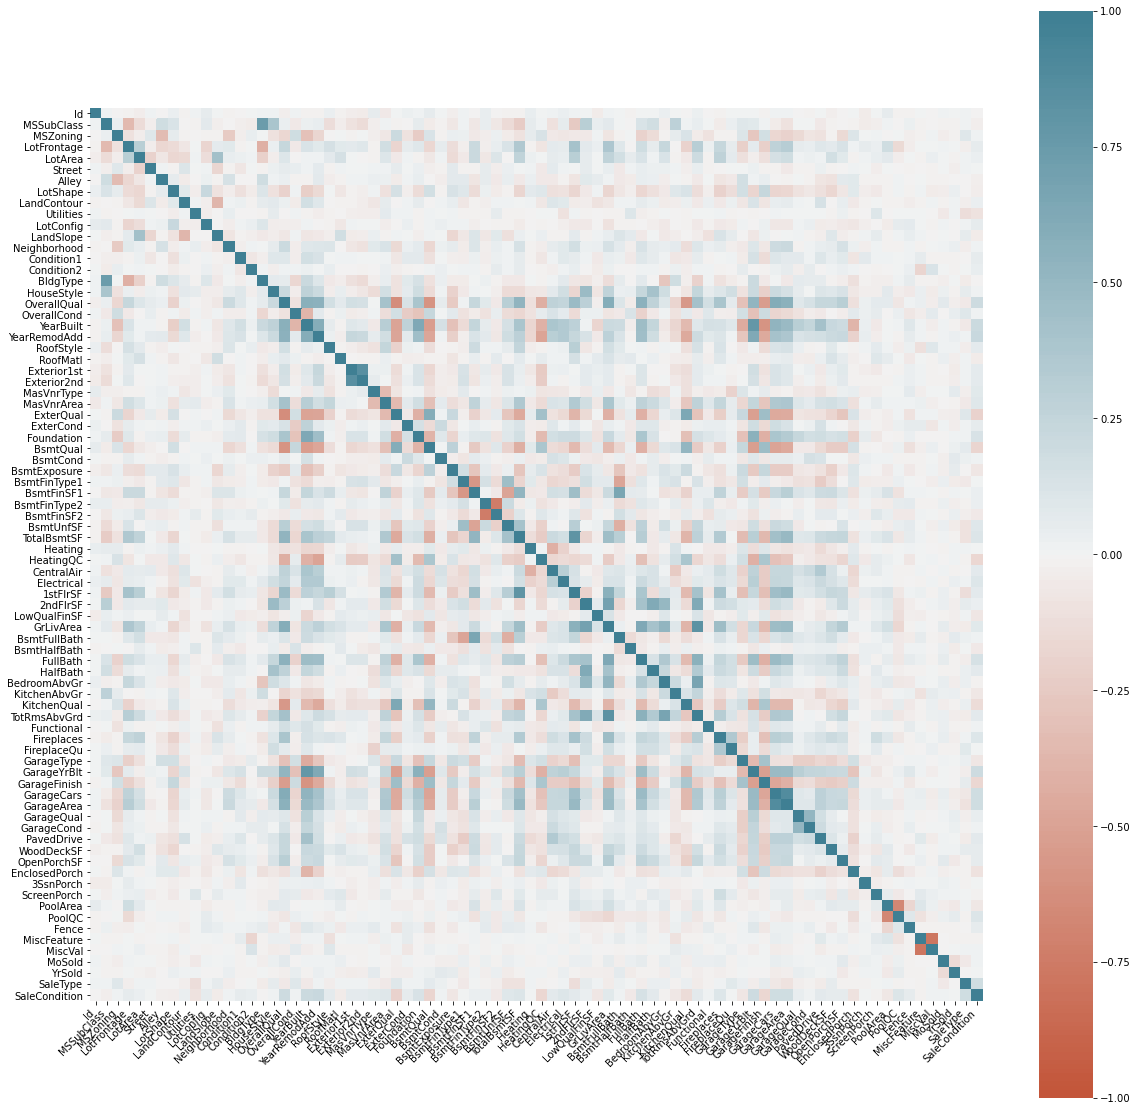

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import savefig
plt.subplots(figsize=(20, 20))
dfnumcat = dfnumcat2.copy()

## Agregar mapa de calor
## complementar con media mediana y moda
dfnumcatCorrMtx = dfnumcat.corr()

ax = sns.heatmap(
    dfnumcatCorrMtx,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
figure= ax.get_figure()
figure.savefig("figcorr80.png", dpi=400)

## Selección de características
### K-fold crossvalidation

In [29]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

errors = []
for train_index, test_index in kf.split(data):
    train = data.iloc[train_index, :]
    test = data.iloc[test_index, :]

    pred = train['actual'].mean()
    test['forecast'] = pred
    error = mean_squared_error(test['actual', test['forecast']])
    errors.append(error)

print(np.mean(errors))

NameError: name 'data' is not defined

## Selección de características

In [ ]:
'''
Seleccion de caracteristicas: DesitionTreeRegressor
'''
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=DecisionTreeRegressor(), step=1, cv=10, scoring='r2')
rfecv.fit(dfnumcat, df['SalePrice'])

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(dfnumcat.columns[rfecv.support_]))


NameError: name 'dfnumcat2' is not defined

## Autoselección de características... !! algo tardado

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
dfnumcat = dfnumcat.drop(['SalePrice'], axis=1)

cols = columnas[0:80]
Xtrain = dfnumcat
ytrain = df['SalePrice']

X = Xtrain[cols]
y = ytrain #Variable objetivo

model = LogisticRegression()
# create the RFE model and select N attributes
rfe = RFE(model, 79)
#rfe = rfe.fit(X, y)

C:\Users\miguel\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=79 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Malla de búsqueda (GridSearchCV & DecisionTreeRegressor)

In [ ]:
'''
ADDING GRID SEARCH: BUSQUEDA POR VALIDACION CRUZADA
'''

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
Xtrain, Xtest, ytrain, ytest = train_test_split(dfnumcat, y, test_size=0.2, random_state=12345, shuffle=False)

my_dt = GridSearchCV(DecisionTreeRegressor(random_state=12345),
                    {"min_samples_split": list(range(20, 50, 2)),
                    "max_features": [0.6, 0.7, 0.8, 0.9, 1.],
                    "criterion": ["mse", "mae"]},
                    scoring = 'r2', n_jobs = -1)
Xtrain.shape
ytrain.shape
my_dt.fit(Xtrain, ytrain)
print(r2_score(list(ytest), list(my_dt.predict(Xtest))))

0.7225436982897837


## Malla de búsqueda (GridSearchCV & KNeighborsRegressor)

In [ ]:
'''
GRID SEARCH CV KNN
'''
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
my_knn = GridSearchCV(KNeighborsRegressor(),
                    {"n_neighbors": [2, 4, 6, 8, 10,12]},
                    scoring = 'r2', n_jobs = -1)
my_knn.fit(Xtrain, ytrain)

print(r2_score(list(ytest), list(my_knn.predict(Xtest))))
# Salida 0.5353894399638821
print(my_knn.best_estimator_)
print(my_knn.best_score_, my_knn.best_params_)

0.5353894399638821
KNeighborsRegressor(n_neighbors=6)
0.6631894631814182 {'n_neighbors': 6}


## Búsqueda aleatoria con Validación Cruzada y K vecinos cercanos
## Random Search + Cv + KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

my_knn = RandomizedSearchCV(KNeighborsRegressor(),
                    {'n_neighbors':list(range(1, 20))},
                    scoring = 'r2', n_iter=10, n_jobs = -1)

my_knn.fit(Xtrain, ytrain)
print(r2_score(list(ytest), list(my_knn.predict(Xtest))))
# salida 0.5353894399638821
print("my_knn.best_estimator_ :", my_knn.best_estimator_)
print("SCORE & PARAMS: ", my_knn.best_score_, my_knn.best_params_)

0.5675747801225308
my_knn.best_estimator_ : KNeighborsRegressor(n_neighbors=8)
SCORE & PARAMS:  0.6613260610525985 {'n_neighbors': 8}


In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## DesitionTreeRegressor

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
regModel = DecisionTreeRegressor(max_depth=5)
regModel.fit(X, y)
y_pred=regModel.predict(X)

np.sqrt(mean_squared_error(y, y_pred))

29026.44464020212

## Regresion con Decision Tree Regressor

In [ ]:
'''
REGRESSION
'''
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

dfnumcat = dfnumcat
#dfnumcat.info()

y = df.SalePrice
Xtrain, Xtest, ytrain, ytest = train_test_split(dfnumcat, y, test_size=0.2, random_state=12345, shuffle=False)

dtr = DecisionTreeRegressor(random_state=12345)

dtr = dtr.fit(Xtrain, ytrain)

print(r2_score(list(ytrain), list(dtr.predict(Xtrain))))
print(r2_score(list(ytest), list(dtr.predict(Xtest))))

ypred = dtr.predict(Xtest)

print("sklearn metrics MSE:", mean_squared_error(ytest, ypred))

actNp = np.array(ytest)
actFc = np.array(ypred)

# Mean Squared Error
mse=1/(actNp.size)*(np.sum((actNp-actFc)**2))
print(f'Calculated mse: {mse:.5f} \n')
# Root Mean Squared Error
rmse=np.sqrt(mse)
print(f'rmse: {rmse:.5f} \n')

print(mean_absolute_error(ytest, ypred))

1.0
0.5550154454603338
sklearn metrics MSE: 2983785869.6232877
Calculated mse: 2983785869.62329 

rmse: 54624.04113 

29761.705479452055


## Desempeño del algoritmo de regresión

Id                  1.0
MSSubClass         60.0
MSZoning            3.0
LotFrontage        65.0
LotArea          8450.0
                  ...  
MiscVal             0.0
MoSold              2.0
YrSold           2008.0
SaleType            8.0
SaleCondition       4.0
Name: 0, Length: 80, dtype: float64
DESEMPEÑO DEL ENTRENAMIENTO... con los primeros renglones
[208500.]  vs  208500
[181500.]  vs  181500
[223500.]  vs  223500
[140000.]  vs  140000
[250000.]  vs  250000
[143000.]  vs  143000
[307000.]  vs  307000
[200000.]  vs  200000
[129900.]  vs  129900
[118000.]  vs  118000
[129500.]  vs  129500
[345000.]  vs  345000
[144000.]  vs  144000
[279500.]  vs  279500
[157000.]  vs  157000
[132000.]  vs  132000
DESEMPEÑO DE LA PRUEBA... con los primeros renglones
[172500.]  vs  235000
[755000.]  vs  625000
[157000.]  vs  171000
[161500.]  vs  163000
[147400.]  vs  171900
[240000.]  vs  200500
[210000.]  vs  239000
[278000.]  vs  285000
[143000.]  vs  119500
[62383.]  vs  115000
[66500.]  vs  1549

<ipython-input-171-a3534ef52a11>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


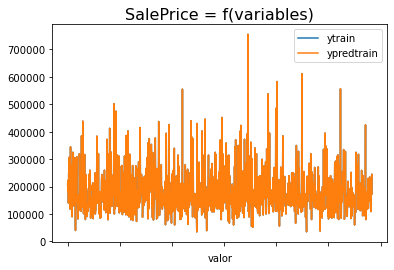

Train_MSE: 0.0
PLOTEO DE DATOS DE PRUEBA


<ipython-input-171-a3534ef52a11>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


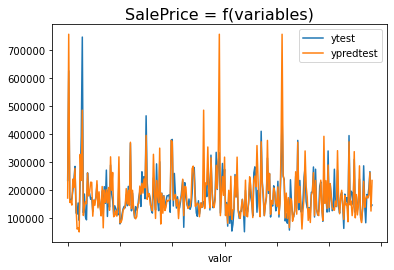

Test_MSE:54624.04113230078


In [ ]:
print(dfnumcat.iloc[0])

print("DESEMPEÑO DEL ENTRENAMIENTO... con los primeros renglones")
for j in range(16):
    print(dtr.predict([Xtrain.iloc[j]]), " vs ", ytrain.iloc[j])

print("DESEMPEÑO DE LA PRUEBA... con los primeros renglones")
for j in range(16):
    print(dtr.predict([Xtest.iloc[j]]), " vs ", ytest.iloc[j])

print("PLOTEO DE DATOS DE ENTRENAMIENTO")
ypredtrain = dtr.predict(Xtrain)
datax = range(0, len(ypredtrain)) # eje horizontal
datatrain = pd.DataFrame({'valor':datax, 'ytrain':ytrain, 'ypredtrain':ypredtrain})
ax = datatrain.plot.line(x='valor')
ax.set_title('SalePrice = f(variables)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
print("Train_MSE: "+str(np.sqrt(mean_squared_error(ytrain, ypredtrain))))

print("PLOTEO DE DATOS DE PRUEBA")
datahorizontal = range(0, len(ytest))
ypredtest = dtr.predict(Xtest)
len(ypredtest)
dataset = pd.DataFrame({'valor': datahorizontal, 'ytest': ytest, 'ypredtest':ypredtest})
ax = dataset.plot.line(x='valor')
ax.set_title('SalePrice = f(variables)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
print("Test_MSE:"+ str(np.sqrt(mean_squared_error(ytest, ypredtest))))

In [ ]:
print("DESEMPEÑO DEL ENTRENAMIENTO... con los primeros renglones")
for j in range(16):
    print(dtr.predict([Xtrain.iloc[j]]), " vs ", ytrain.iloc[j])

DESEMPEÑO DEL ENTRENAMIENTO... con los primeros renglones
[205118.95]  vs  208500
[173054.82]  vs  181500
[220729.3]  vs  223500
[153464.]  vs  140000
[273359.89]  vs  250000
[146089.68]  vs  143000
[303122.58]  vs  307000
[209953.12]  vs  200000
[148120.95]  vs  129900
[119535.5]  vs  118000
[131066.5]  vs  129500
[348954.13]  vs  345000
[137336.]  vs  144000
[253473.2]  vs  279500
[155272.5]  vs  157000
[139118.]  vs  132000


In [ ]:

print("DESEMPEÑO DE LA PRUEBA... con los primeros renglones")
for j in range(16):
    print(dtr.predict([Xtest.iloc[j]]), " vs ", ytest.iloc[j])

DESEMPEÑO DE LA PRUEBA... con los primeros renglones
[172500.]  vs  235000
[755000.]  vs  625000
[157000.]  vs  171000
[161500.]  vs  163000
[147400.]  vs  171900
[240000.]  vs  200500
[210000.]  vs  239000
[278000.]  vs  285000
[143000.]  vs  119500
[62383.]  vs  115000
[66500.]  vs  154900
[52000.]  vs  93000
[328000.]  vs  250000
[235000.]  vs  392500
[485000.]  vs  745000
[110500.]  vs  120000


## Regresión con Random Forest Regressor

In [ ]:
dtr = dtr.fit(Xtrain, ytrain)

from sklearn.metrics import r2_score
print(r2_score(list(ytrain), list(dtr.predict(Xtrain))))
print(r2_score(list(ytest), list(dtr.predict(Xtest))))

ypred = dtr.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("sklearn metrics MSE:", mean_squared_error(ytest, ypred))

actNp=np.array(ytest)
actFc=np.array(ypred)

mse=1/(actNp.size)*(np.sum((actNp-actFc)**2))
print(f'Calculated mse: {mse:.5f} \n')

# Root Mean Squared Error
rmse=np.sqrt(mse)
print(f'rmse: {rmse:.5f} \n')

print(mean_absolute_error(ytest, ypred))


1.0
0.5550154454603338
sklearn metrics MSE: 2983785869.6232877
Calculated mse: 2983785869.62329 

rmse: 54624.04113 

29761.705479452055


In [ ]:
print("DESEMPEÑO DEL ENTRENAMIENTO... con los primeros renglones")
for j in range(16):
    print(dtr.predict([Xtrain.iloc[j]]), " vs ", ytrain.iloc[j])

DESEMPEÑO DEL ENTRENAMIENTO... con los primeros renglones
[205118.95]  vs  208500
[173054.82]  vs  181500
[220729.3]  vs  223500
[153464.]  vs  140000
[273359.89]  vs  250000
[146089.68]  vs  143000
[303122.58]  vs  307000
[209953.12]  vs  200000
[148120.95]  vs  129900
[119535.5]  vs  118000
[131066.5]  vs  129500
[348954.13]  vs  345000
[137336.]  vs  144000
[253473.2]  vs  279500
[155272.5]  vs  157000
[139118.]  vs  132000


In [ ]:
print("DESEMPEÑO DE LA PRUEBA... con los primeros renglones")
for j in range(16):
    print(dtr.predict([Xtest.iloc[j]]), " vs ", ytest.iloc[j])

DESEMPEÑO DE LA PRUEBA... con los primeros renglones
[182912.]  vs  235000
[493058.83]  vs  625000
[148029.5]  vs  171000
[153797.5]  vs  163000
[163671.16]  vs  171900
[180658.29]  vs  200500
[194099.5]  vs  239000
[340331.18]  vs  285000
[129926.5]  vs  119500
[113369.11]  vs  115000
[117298.34]  vs  154900
[101847.76]  vs  93000
[281869.8]  vs  250000
[272784.93]  vs  392500
[517875.54]  vs  745000
[128096.9]  vs  120000


PLOTEO DE DATOS DE ENTRENAMIENTO


<ipython-input-192-9c8296a2fda3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


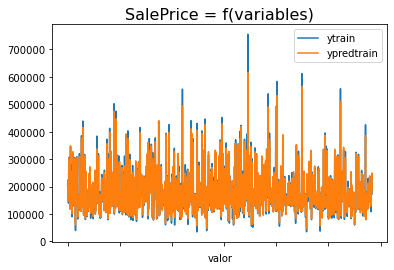

Train_MSE: 11504.149470821603
PLOTEO DE DATOS DE PRUEBA


<ipython-input-192-9c8296a2fda3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


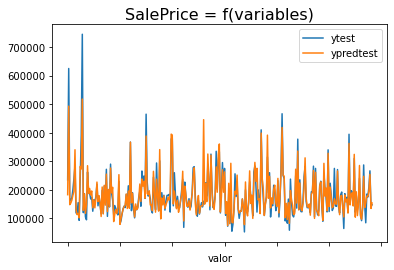

Test_MSE:34485.63010199865


In [ ]:
print("PLOTEO DE DATOS DE ENTRENAMIENTO")
ypredtrain = dtr.predict(Xtrain)
datax = range(0, len(ypredtrain)) # eje horizontal
datatrain = pd.DataFrame({'valor':datax, 'ytrain':ytrain, 'ypredtrain':ypredtrain})
ax = datatrain.plot.line(x='valor')
ax.set_title('SalePrice = f(variables)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
print("Train_MSE: "+str(np.sqrt(mean_squared_error(ytrain, ypredtrain))))

print("PLOTEO DE DATOS DE PRUEBA")
datahorizontal = range(0, len(ytest))
ypredtest = dtr.predict(Xtest)
len(ypredtest)
dataset = pd.DataFrame({'valor': datahorizontal, 'ytest': ytest, 'ypredtest':ypredtest})
ax = dataset.plot.line(x='valor')
ax.set_title('SalePrice = f(variables)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
print("Test_MSE:"+ str(np.sqrt(mean_squared_error(ytest, ypredtest))))

In [ ]:
'''
CLASIFICACION
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

df['SalePrice'].agg(["min", "max", "median", "mean"], axis="rows")
bins=[34900-1, 100000, 500000, 755000+1]
names=["bajo", "medio", "alto"]
yclass = pd.cut(df["SalePrice"], bins, labels=names)
yclass.head()
yclass.tail()

Xclasstrain, Xclasstest, yclasstrain, yclasstest = train_test_split(dfnumcat, yclass, test_size=0.2, random_state=12345, shuffle=False)

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 8):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=12345)
    dtree.fit(Xclasstrain, yclasstrain)
    yclasspred = dtree.predict(Xclasstest)
    acc_gini.append(metrics.accuracy_score(yclasstest, yclasspred))
    print("i=", i, "gini  :", metrics.accuracy_score(yclasstest, yclasspred) )
    ####
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=12345)
    dtree.fit(Xclasstrain, yclasstrain)
    yclasspred = dtree.predict(Xclasstest)
    acc_entropy.append(metrics.accuracy_score(yclasstest, yclasspred))
    ####
    max_depth.append(i)
    print("i=", i, "entropy: ", metrics.accuracy_score(yclasstest, yclasspred))

i= 1 gini  : 0.928082191780822
i= 1 entropy:  0.928082191780822
i= 2 gini  : 0.9315068493150684
i= 2 entropy:  0.9417808219178082
i= 3 gini  : 0.9315068493150684
i= 3 entropy:  0.934931506849315
i= 4 gini  : 0.934931506849315
i= 4 entropy:  0.9486301369863014
i= 5 gini  : 0.9315068493150684
i= 5 entropy:  0.958904109589041
i= 6 gini  : 0.928082191780822
i= 6 entropy:  0.9623287671232876
i= 7 gini  : 0.9246575342465754
i= 7 entropy:  0.9452054794520548


In [ ]:
dtreeg = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=12345)
dtreeg = dtreeg.fit(Xclasstrain, yclasstrain)
yclasspred = dtreeg.predict(Xclasstest)
print("Desempeno gini=", metrics.accuracy_score(yclasstest, yclasspred))

Desempeno gini= 0.928082191780822


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=12345)
clf = clf.fit(Xclasstrain, yclasstrain)
yclasspred = clf.predict(Xclasstest)
print("Accurancy:", metrics.accuracy_score(yclasstest, yclasspred))

Accurancy: 0.9623287671232876


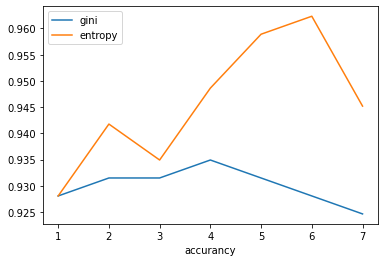

In [ ]:
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})

plt.plot('max_depth', 'acc_gini', data=d, label='gini')
plt.plot('max_depth', 'acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.xlabel('accurancy')
plt.legend()

## Otra opción: Uso de condicionales para definir clases

In [ ]:
dfTrain = dfnumcat # no tiene SalePrice
dfTrain.shape
dfnumcat.shape
conditions = [
    (df['SalePrice'] <= 100000),
    (df['SalePrice'] > 100000) & (df['SalePrice'] <= 500000),
    (df['SalePrice'] > 500000)
]

values = ['Plow', 'PMedium', 'PHigh']

yclass = np.select(conditions, values)

Xclasstrain, Xclasstest, yclasstrain, yclasstest = train_test_split(dfnumcat, yclass, test_size=0.2, random_state=12345, shuffle=False)

# RandomForestClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=12345)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
# Train decision tree classifier
clf = clf.fit(Xclasstrain, yclasstrain)
yclasspred = clf.predict(Xclasstest)
print("Accurancy:", metrics.accuracy_score(yclasstest, yclasspred))

Accurancy: 0.9623287671232876
